# Práctica 1: primera exploración a los datos



##### Cookbook [@data_mining_2020](https://nbviewer.jupyter.org/github/JacoboGGLeon/data_mining_2020/blob/master/README.ipynb)

## Resources

* [Dipanjan Sarkar, Raghav Bali, Tushar Sharma - Practical Machine Learning with Python - Apress (2018).pdf](https://drive.google.com/file/d/1mPwVx8mTmr69dxw1Ku7LMsf4WsAH7lMc/view?usp=sharing)
* [Missingno](https://github.com/ResidentMario/missingno)
* [Python Outlier Detection (PyOD)](https://github.com/yzhao062/pyod)
* [Hands on Exploratory Data analysis with Python](https://github.com/PacktPublishing/hands-on-exploratory-data-analysis-with-python)
* [Python Machine Learning](https://github.com/PacktPublishing/Python-Machine-Learning-Third-Edition)

## Recipe 

## CRISP-DM methodology. 

It is one of the standard workflows followed by data mining good practices across the world. We will concentrate on the following sub-sections of this methodology:
* Data collection, task in **data understanding**: to understand different data retrieval mechanisms for different data types
* Data description, task in **data understanding**: to understand various attributes and properties of the data collected
* Data wrangling, task in **data preparation**: to prepare data for consumption in the modeling steps
* Data visualization, task in **data preparation**: to visualize different attributes for sharing results, better
understanding, and so on


![](https://s3.amazonaws.com/media-p.slid.es/uploads/848972/images/6801402/pasted-from-clipboard.png)

In [24]:
conda install -c conda-forge/label/gcc7 missingno

Solving environment: done

## Package Plan ##

  environment location: /home/vagrant/anaconda3

  added / updated specs:
    - missingno


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2018.10.15 |       ha4d7672_0         135 KB  conda-forge/label/gcc7
    certifi-2018.8.24          |        py37_1001         139 KB  conda-forge/label/gcc7
    missingno-0.4.1            |             py_0          10 KB  conda-forge/label/gcc7
    openssl-1.1.1d             |       h7b6447c_4         2.5 MB
    ------------------------------------------------------------
                                           Total:         2.8 MB

The following packages will be UPDATED:

  openssl            conda-forge::openssl-1.1.1d-h516909a_0 --> pkgs/main::openssl-1.1.1d-h7b6447c_4

The following packages will be SUPERSEDED by a higher-priority channel:

  ca-certificates    conda-forge::ca-c

In [132]:
import pandas as pd
import numpy as np
import missingno as msno
%matplotlib inline

In [303]:
#https://www.inegi.org.mx/programas/enigh/nc/2018/default.html#Microdatos
path = 'conjunto_de_datos_agro_enigh_2018_ns.csv'
df = pd.read_csv(path, encoding='latin', error_bad_lines=False)
df.head()

,folioviv,foliohog,numren,id_trabajo,tipoact,cose_cria,prep_deriv,otro_pago,fpago_1,fpago_2,...,ventas,autocons,otrosnom,gasneg,ventas_tri,auto_tri,otros_tri,gasto_tri,ing_tri,ero_tri
0,100317506,1,1,1,4,1,,2,,,...,0,0,0,80000,0.00,0.0,0.0,19565.21,0.00,19563.26
1,100317506,1,1,1,5,1,2,2,,,...,500000,0,0,391000,122282.60,0.0,0.0,95624.99,26656.63,0.00
2,100961704,1,1,2,4,1,,1,,2,...,0,0,0,50000,0.00,0.0,0.0,12295.08,0.00,12293.11
3,100961704,1,1,2,5,1,1,1,,2,...,2669678,0,1000,336300,656478.19,0.0,245.9,82696.72,574025.90,0.00
4,101917906,1,1,2,7,1,,2,,,...,60,0,0,100,14.67,0.0,0.0,24.45,0.00,8.80


General Stats

In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14925 entries, 0 to 14924
Data columns (total 56 columns):
folioviv      14925 non-null int64
foliohog      14925 non-null int64
numren        14925 non-null int64
id_trabajo    14925 non-null int64
tipoact       14925 non-null int64
cose_cria     14925 non-null int64
prep_deriv    14925 non-null object
otro_pago     14925 non-null int64
fpago_1       14925 non-null object
fpago_2       14925 non-null object
fpago_3       14925 non-null object
fpago_4       14925 non-null object
fpago_5       14925 non-null object
fpago_6       14925 non-null object
fpago_7       14925 non-null object
fpago_8       14925 non-null object
nofpago       14925 non-null object
t_emp         14925 non-null int64
h_emp         14925 non-null object
m_emp         14925 non-null object
t_cpago       14925 non-null object
h_cpago       14925 non-null object
m_cpago       14925 non-null object
t_ispago      14925 non-null object
h_ispago      14925 non-null object

Shape of dataframe

In [121]:
df.shape

(14925, 56)

Number of rows

In [122]:
df.shape[0]

14925

Number of columns

In [123]:
df.shape[1]

56

Column Names

In [124]:
df.columns.values.tolist()

['folioviv',
 'foliohog',
 'numren',
 'id_trabajo',
 'tipoact',
 'cose_cria',
 'prep_deriv',
 'otro_pago',
 'fpago_1',
 'fpago_2',
 'fpago_3',
 'fpago_4',
 'fpago_5',
 'fpago_6',
 'fpago_7',
 'fpago_8',
 'nofpago',
 't_emp',
 'h_emp',
 'm_emp',
 't_cpago',
 'h_cpago',
 'm_cpago',
 't_ispago',
 'h_ispago',
 'm_ispago',
 't_nispago',
 'h_nispago',
 'm_nispago',
 'valrema',
 'valproc',
 'apoyo',
 'apoyo_1',
 'apoyo_2',
 'apoyo_3',
 'apoyo_4',
 'apoyo_5',
 'apoyo_6',
 'apoyo_7',
 'apoyo_8',
 'procampo',
 'mesproc',
 'progan',
 'mesprogan',
 'reg_not',
 'reg_cont',
 'ventas',
 'autocons',
 'otrosnom',
 'gasneg',
 'ventas_tri',
 'auto_tri',
 'otros_tri',
 'gasto_tri',
 'ing_tri',
 'ero_tri']

Column Data Types

In [125]:
df.dtypes

folioviv        int64
foliohog        int64
numren          int64
id_trabajo      int64
tipoact         int64
cose_cria       int64
prep_deriv     object
otro_pago       int64
fpago_1        object
fpago_2        object
fpago_3        object
fpago_4        object
fpago_5        object
fpago_6        object
fpago_7        object
fpago_8        object
nofpago        object
t_emp           int64
h_emp          object
m_emp          object
t_cpago        object
h_cpago        object
m_cpago        object
t_ispago       object
h_ispago       object
m_ispago       object
t_nispago      object
h_nispago      object
m_nispago      object
valrema        object
valproc        object
apoyo           int64
apoyo_1        object
apoyo_2        object
apoyo_3        object
apoyo_4        object
apoyo_5        object
apoyo_6        object
apoyo_7        object
apoyo_8        object
procampo       object
mesproc        object
progan         object
mesprogan      object
reg_not         int64
reg_cont  

Are there missing values?

In [135]:
df.isnull().any().any()

False

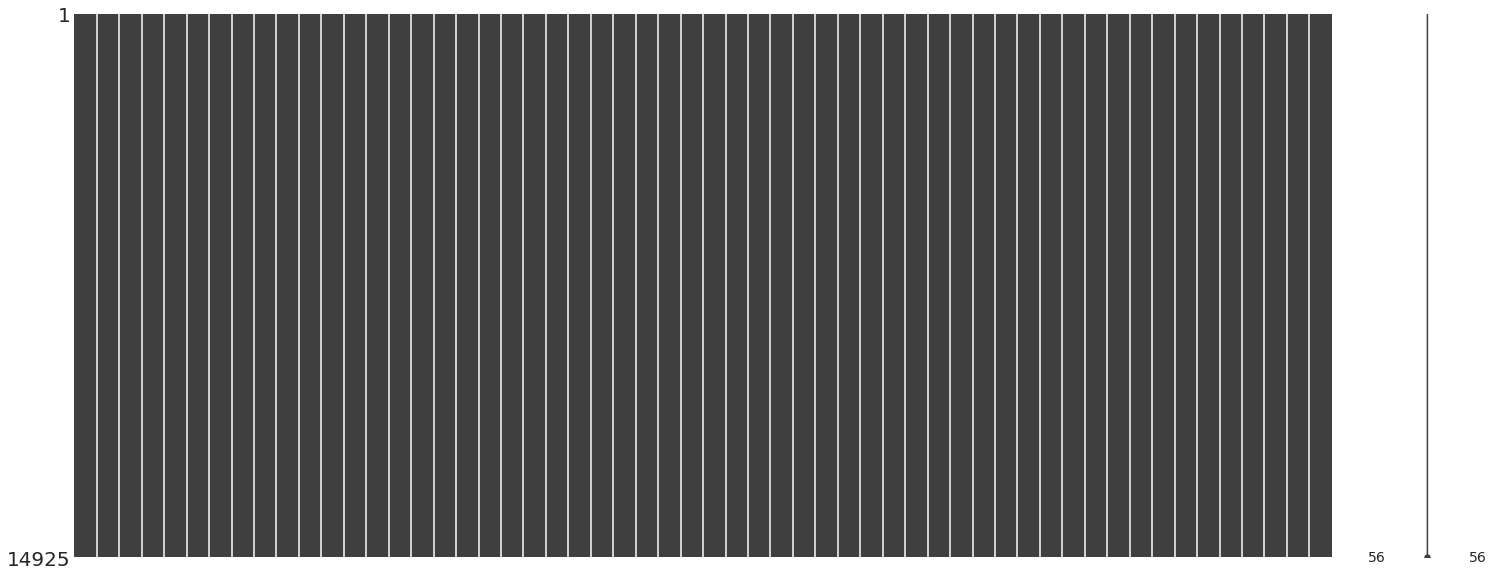

In [136]:
msno.matrix(df)

In [304]:
df.replace({' ': np.nan}, inplace=True)

In [305]:
df.isnull().any().any()

True

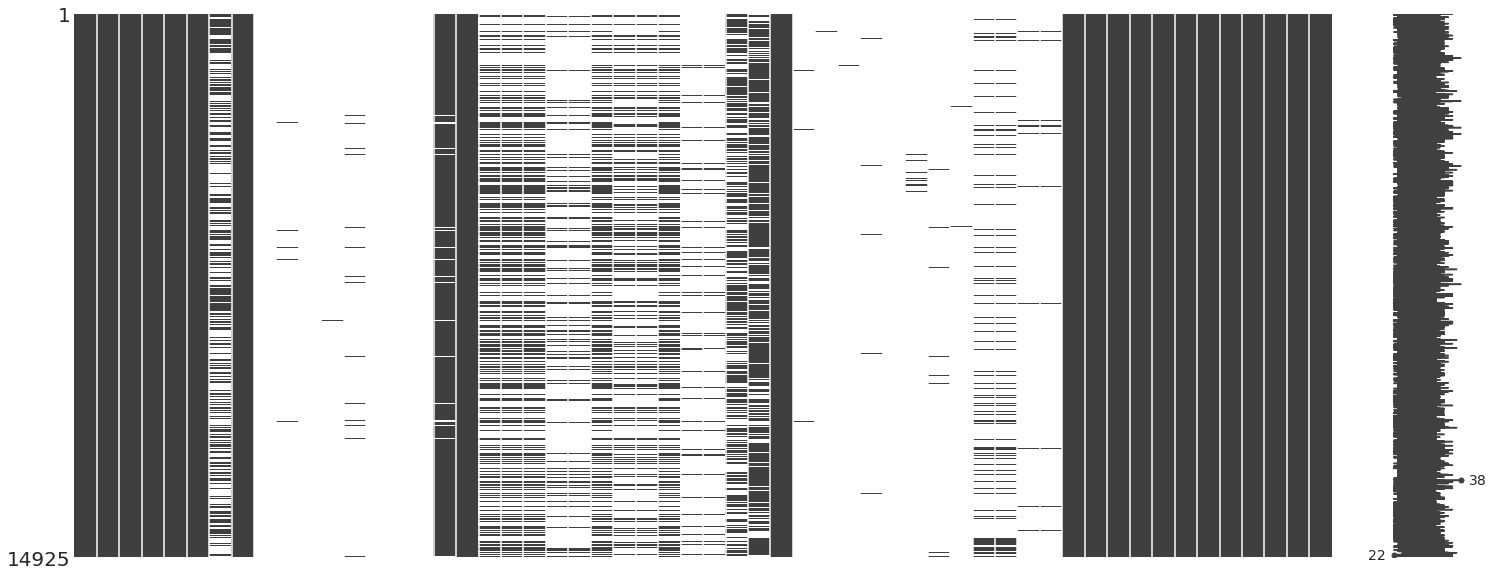

In [306]:
msno.matrix(df)

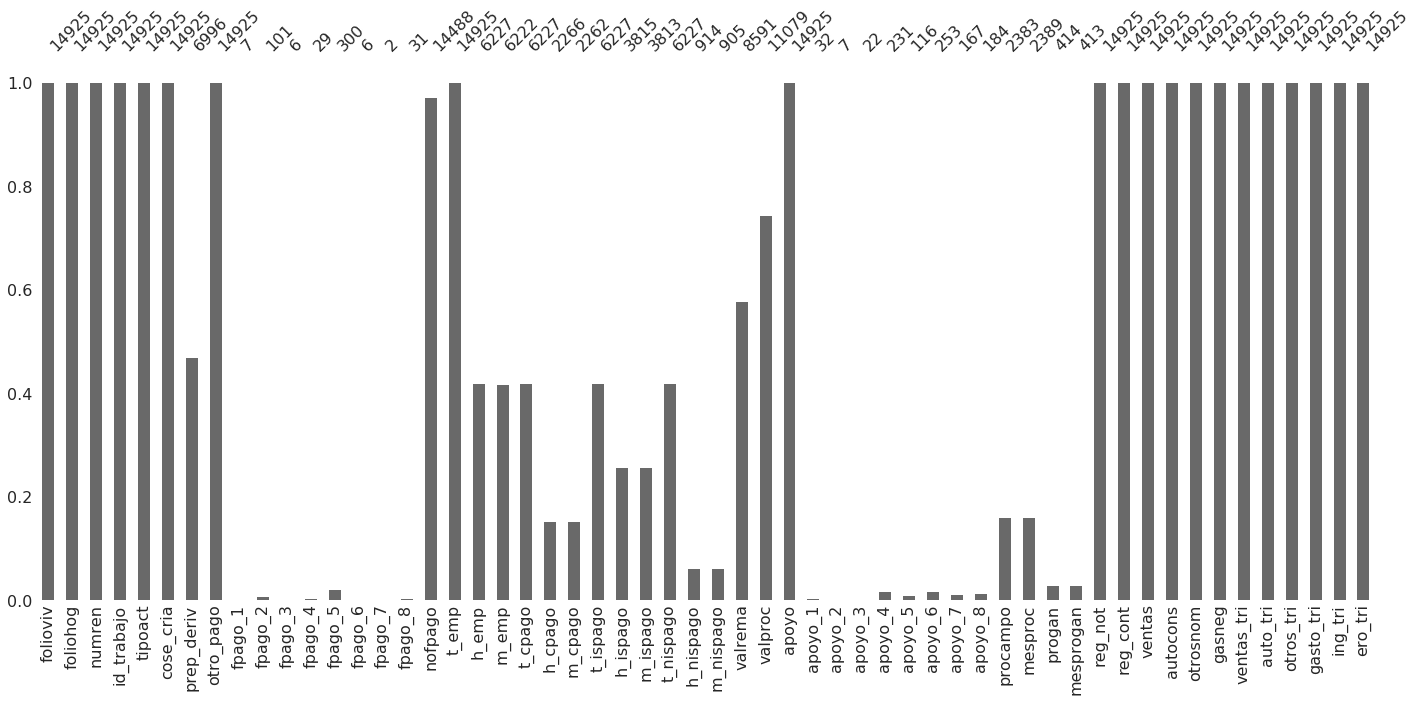

In [140]:
msno.bar(df)

Columns with Missing Values

In [141]:
df.columns[df.isnull().any()].tolist()

['prep_deriv',
 'fpago_1',
 'fpago_2',
 'fpago_3',
 'fpago_4',
 'fpago_5',
 'fpago_6',
 'fpago_7',
 'fpago_8',
 'nofpago',
 'h_emp',
 'm_emp',
 't_cpago',
 'h_cpago',
 'm_cpago',
 't_ispago',
 'h_ispago',
 'm_ispago',
 't_nispago',
 'h_nispago',
 'm_nispago',
 'valrema',
 'valproc',
 'apoyo_1',
 'apoyo_2',
 'apoyo_3',
 'apoyo_4',
 'apoyo_5',
 'apoyo_6',
 'apoyo_7',
 'apoyo_8',
 'procampo',
 'mesproc',
 'progan',
 'mesprogan']

Number of rows with Missing Values

Summary Stats

In [143]:
df.describe()

,folioviv,foliohog,numren,id_trabajo,tipoact,cose_cria,otro_pago,t_emp,apoyo,reg_not,...,ventas,autocons,otrosnom,gasneg,ventas_tri,auto_tri,otros_tri,gasto_tri,ing_tri,ero_tri
count,1.492500e+04,14925.000000,14925.000000,14925.000000,14925.000000,14925.000000,14925.000000,14925.000000,14925.000000,14925.0,...,1.492500e+04,14925.000000,14925.000000,1.492500e+04,1.492500e+04,14925.000000,14925.000000,14925.000000,1.492500e+04,14925.000000
mean,1.841456e+09,1.004958,1.384925,1.239799,4.595980,1.002747,1.970720,0.855075,1.923886,2.0,...,2.493059e+04,3058.463250,83.132127,1.546851e+04,6.121473e+03,751.052493,20.457512,3797.801142,3.813851e+03,719.248916
std,8.765220e+08,0.072124,0.758743,0.426975,0.795313,0.052342,0.168595,1.492758,0.265189,0.0,...,1.184336e+05,6774.615586,2174.137091,6.220150e+04,2.915321e+04,1667.656881,538.547811,15278.586263,1.924913e+04,5893.089901
min,1.003175e+08,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000,0.000000,1.000000,2.0,...,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000
25%,1.161174e+09,1.000000,1.000000,1.000000,4.000000,1.000000,2.000000,0.000000,2.000000,2.0,...,0.000000e+00,0.000000,0.000000,5.500000e+02,0.000000e+00,0.000000,0.000000,134.510000,0.000000e+00,0.000000
50%,1.860410e+09,1.000000,1.000000,1.000000,5.000000,1.000000,2.000000,0.000000,2.000000,2.0,...,1.300000e+03,1270.000000,0.000000,2.100000e+03,3.179300e+02,312.790000,0.000000,513.580000,6.016300e+02,0.000000
75%,2.560551e+09,1.000000,2.000000,1.000000,5.000000,1.000000,2.000000,1.000000,2.000000,2.0,...,1.205000e+04,3805.000000,0.000000,8.260000e+03,2.973910e+03,936.880000,0.000000,2029.890000,2.444670e+03,0.000000
max,3.260799e+09,3.000000,12.000000,2.000000,9.000000,2.000000,2.000000,14.000000,2.000000,2.0,...,6.750000e+06,402400.000000,220000.000000,1.828000e+06,1.678177e+06,100044.190000,54696.130000,454475.130000,1.223700e+06,297132.060000


Select specific row index

In [144]:
df.loc[[0]]

,folioviv,foliohog,numren,id_trabajo,tipoact,cose_cria,prep_deriv,otro_pago,fpago_1,fpago_2,...,ventas,autocons,otrosnom,gasneg,ventas_tri,auto_tri,otros_tri,gasto_tri,ing_tri,ero_tri
0,100317506,1,1,1,4,1,NaN,2,NaN,NaN,...,0,0,0,80000,0.0,0.0,0.0,19565.21,0.0,19563.26


Select specific row indices

In [145]:
df.loc[30:33]

,folioviv,foliohog,numren,id_trabajo,tipoact,cose_cria,prep_deriv,otro_pago,fpago_1,fpago_2,...,ventas,autocons,otrosnom,gasneg,ventas_tri,auto_tri,otros_tri,gasto_tri,ing_tri,ero_tri
30,160006216,1,1,1,5,1,1,2,NaN,NaN,...,976220,0,0,432000,242706.62,0.00,0.0,107403.31,135301.32,0.00
31,160006520,1,1,2,5,1,2,2,NaN,NaN,...,76000,0,0,36000,18586.95,0.00,0.0,8804.34,9781.63,0.00
32,160006524,1,7,1,4,1,NaN,2,NaN,NaN,...,0,0,0,9000,0.00,0.00,0.0,2201.08,0.00,2201.08
33,160006524,1,7,1,5,1,1,2,NaN,NaN,...,86124,3796,0,31200,21062.93,928.36,0.0,7630.43,14359.89,0.00


Excluding Specific Row indices

In [146]:
df.drop([0,24,51], axis=0).head()

,folioviv,foliohog,numren,id_trabajo,tipoact,cose_cria,prep_deriv,otro_pago,fpago_1,fpago_2,...,ventas,autocons,otrosnom,gasneg,ventas_tri,auto_tri,otros_tri,gasto_tri,ing_tri,ero_tri
1,100317506,1,1,1,5,1,2,2,NaN,NaN,...,500000,0,0,391000,122282.60,0.0,0.0,95624.99,26656.63,0.00
2,100961704,1,1,2,4,1,NaN,1,NaN,2,...,0,0,0,50000,0.00,0.0,0.0,12295.08,0.00,12293.11
3,100961704,1,1,2,5,1,1,1,NaN,2,...,2669678,0,1000,336300,656478.19,0.0,245.9,82696.72,574025.90,0.00
4,101917906,1,1,2,7,1,NaN,2,NaN,NaN,...,60,0,0,100,14.67,0.0,0.0,24.45,0.00,8.80
5,101998619,1,1,1,4,1,NaN,2,NaN,NaN,...,0,0,0,1000,0.00,0.0,0.0,245.90,0.00,244.91


Excluding Specific Range Row indices

In [147]:
df.drop(df.index[1:5], axis=0).head(10)

,folioviv,foliohog,numren,id_trabajo,tipoact,cose_cria,prep_deriv,otro_pago,fpago_1,fpago_2,...,ventas,autocons,otrosnom,gasneg,ventas_tri,auto_tri,otros_tri,gasto_tri,ing_tri,ero_tri
0,100317506,1,1,1,4,1,NaN,2,NaN,NaN,...,0,0,0,80000,0.00,0.00,0.0,19565.21,0.00,19563.26
5,101998619,1,1,1,4,1,NaN,2,NaN,NaN,...,0,0,0,1000,0.00,0.00,0.0,245.90,0.00,244.91
6,101998619,1,1,1,5,1,2,2,NaN,NaN,...,18000,0,0,200,4426.22,0.00,0.0,49.18,4376.06,0.00
7,101998802,1,1,2,5,1,2,2,NaN,NaN,...,30000,0,0,28250,7377.04,0.00,0.0,6946.72,427.86,0.00
8,102022605,1,1,1,4,1,NaN,2,NaN,NaN,...,51250,0,0,65700,12602.45,0.00,0.0,16155.73,0.00,3552.78
9,102041503,1,1,2,5,1,2,2,NaN,NaN,...,0,0,0,300,0.00,0.00,0.0,73.36,0.00,73.36
10,102110402,1,2,1,6,1,NaN,2,NaN,NaN,...,32970,780,0,1040,8063.31,190.76,0.0,254.34,7997.28,0.00
11,102126212,1,1,1,4,1,NaN,2,NaN,NaN,...,400,500,0,318,99.44,124.30,0.0,79.06,143.20,0.00
12,102137224,1,1,1,4,1,NaN,2,NaN,NaN,...,0,9100,0,9540,0.00,2262.43,0.0,2371.82,0.00,107.40
13,102137224,1,1,1,5,1,2,2,NaN,NaN,...,4500,3000,0,600,1118.78,745.85,0.0,149.17,1715.46,0.00


Subsetting based on offset from top (bottom)

In [148]:
df[100:].head() #df.tail(-100) )

,folioviv,foliohog,numren,id_trabajo,tipoact,cose_cria,prep_deriv,otro_pago,fpago_1,fpago_2,...,ventas,autocons,otrosnom,gasneg,ventas_tri,auto_tri,otros_tri,gasto_tri,ing_tri,ero_tri
100,160215510,1,1,1,5,1,1,2,NaN,NaN,...,141000,8700,0,58000,34483.69,2127.71,0.0,14184.78,22424.67,0.0
101,160229801,1,3,1,4,1,NaN,2,NaN,NaN,...,44000,0,0,30000,10819.67,0.00,0.0,7377.04,3440.65,0.0
102,160229801,1,3,1,5,1,1,2,NaN,NaN,...,36480,0,0,29200,8970.49,0.00,0.0,7180.32,1788.19,0.0
103,160229803,1,1,1,4,1,NaN,2,NaN,NaN,...,39000,650,0,14600,9590.16,159.83,0.0,3590.16,6158.36,0.0
104,160229803,1,1,1,5,1,2,2,NaN,NaN,...,122500,0,0,36400,30122.95,0.00,0.0,8950.81,21172.13,0.0


Get values for crime

In [150]:
df.apoyo.values

array([2, 2, 2, ..., 2, 2, 2])

In [152]:
df['apoyo'].values

array([2, 2, 2, ..., 2, 2, 2])

In [153]:
df.apoyo.unique()

array([2, 1])

In [154]:
df.apoyo.value_counts()

2    13789
1     1136
Name: apoyo, dtype: int64

Get the number of unique values for each column

In [155]:
df.agg(['count', 'size', 'nunique'])

,folioviv,foliohog,numren,id_trabajo,tipoact,cose_cria,prep_deriv,otro_pago,fpago_1,fpago_2,...,ventas,autocons,otrosnom,gasneg,ventas_tri,auto_tri,otros_tri,gasto_tri,ing_tri,ero_tri
count,14925,14925,14925,14925,14925,14925,6996,14925,7,101,...,14925,14925,14925,14925,14925,14925,14925,14925,14925,14925
size,14925,14925,14925,14925,14925,14925,14925,14925,14925,14925,...,14925,14925,14925,14925,14925,14925,14925,14925,14925,14925
nunique,10159,3,11,2,6,2,2,2,1,1,...,3217,3606,171,3536,4182,5058,254,4941,4781,1763


An `agg` within a `groupby`. And`stack` at the end.

In [156]:
df.groupby('apoyo').agg(['count', 'size', 'nunique']).stack()

folioviv  foliohog  numren  id_trabajo  tipoact  cose_cria  \
apoyo                                                                       
1     count        1136      1136    1136        1136     1136       1136   
      size         1136      1136    1136        1136     1136       1136   
      nunique      1084         2       9           2        4          2   
2     count       13789     13789   13789       13789    13789      13789   
      size        13789     13789   13789       13789    13789      13789   
      nunique      9642         3      11           2        6          2   

               prep_deriv  otro_pago  fpago_1  fpago_2  ...  ventas  autocons  \
apoyo                                                   ...                     
1     count           237       1136        1       16  ...    1136      1136   
      size           1136       1136     1136     1136  ...    1136      1136   
      nunique           2          2        1        1  ...     564       645   
2     count          6759      13789        6       85  ...   13789     13789   
      size          13789      13789    13789    13789  ...   13789     13789   
      nunique           2          2        1        1  ...    2966      3379   

               otrosnom  gasneg  ventas_tri  auto_tri  otros_tri  gasto_tri  \
apoyo                                                                         
1     count        1136    1136        1136      1136       1136       1136   
      size         1136    1136        1136      1136       1136       1136   
      nunique        43     742         644       751         48        855   
2     count       13789   13789       13789     13789      13789      13789   
      size        13789   13789       13789     13789      13789      13789   
      nunique       158    3256        3851      4735        228       4564   

               ing_tri  ero_tri  
apoyo                            
1     count       1136     1136  
      size        1136     1136  
      nunique      766      270  
2     count      13789    13789  
      size       13789    13789  
      nunique     4489     1623  

[6 rows x 55 columns]

In [157]:
df.groupby('apoyo').agg(['count', 'size', 'nunique'])

folioviv                foliohog                numren                 \
         count   size nunique    count   size nunique  count   size nunique   
apoyo                                                                         
1         1136   1136    1084     1136   1136       2   1136   1136       9   
2        13789  13789    9642    13789  13789       3  13789  13789      11   

      id_trabajo  ... otros_tri gasto_tri                ing_tri         \
           count  ...   nunique     count   size nunique   count   size   
apoyo             ...                                                     
1           1136  ...        48      1136   1136     855    1136   1136   
2          13789  ...       228     13789  13789    4564   13789  13789   

              ero_tri                 
      nunique   count   size nunique  
apoyo                                 
1         766    1136   1136     270  
2        4489   13789  13789    1623  

[2 rows x 165 columns]

In [158]:
df_sample = df.sample(frac=0.05, random_state=1)
df_sample.head()

,folioviv,foliohog,numren,id_trabajo,tipoact,cose_cria,prep_deriv,otro_pago,fpago_1,fpago_2,...,ventas,autocons,otrosnom,gasneg,ventas_tri,auto_tri,otros_tri,gasto_tri,ing_tri,ero_tri
5633,1361341224,1,1,2,5,1,1,2,NaN,NaN,...,0,800,0,300,0.00,198.89,0.0,74.58,122.32,0.0
3836,1161699824,1,1,1,4,1,NaN,2,NaN,NaN,...,33600,12680,0,3300,8262.29,3118.03,0.0,811.47,10566.88,0.0
13294,3063210319,1,1,1,4,1,NaN,2,NaN,NaN,...,0,2000,0,780,0.00,489.13,0.0,190.76,296.41,0.0
8423,2060964308,1,1,2,5,1,1,2,NaN,NaN,...,440,1305,0,350,107.60,319.15,0.0,85.59,340.43,0.0
9218,2062504406,1,3,2,5,1,1,2,NaN,NaN,...,22131,9060,0,8440,5412.47,2215.76,0.0,2064.13,5561.41,0.0


In [159]:
df.shape

(14925, 56)

In [160]:
df_sample.shape

(746, 56)

### Data Transform

Drop Rows with missing `count` 

In [161]:
df_dropped = df.dropna(subset=['prep_deriv'])
df_dropped.head()

,folioviv,foliohog,numren,id_trabajo,tipoact,cose_cria,prep_deriv,otro_pago,fpago_1,fpago_2,...,ventas,autocons,otrosnom,gasneg,ventas_tri,auto_tri,otros_tri,gasto_tri,ing_tri,ero_tri
1,100317506,1,1,1,5,1,2,2,NaN,NaN,...,500000,0,0,391000,122282.60,0.0,0.0,95624.99,26656.63,0.00
3,100961704,1,1,2,5,1,1,1,NaN,2,...,2669678,0,1000,336300,656478.19,0.0,245.9,82696.72,574025.90,0.00
6,101998619,1,1,1,5,1,2,2,NaN,NaN,...,18000,0,0,200,4426.22,0.0,0.0,49.18,4376.06,0.00
7,101998802,1,1,2,5,1,2,2,NaN,NaN,...,30000,0,0,28250,7377.04,0.0,0.0,6946.72,427.86,0.00
9,102041503,1,1,2,5,1,2,2,NaN,NaN,...,0,0,0,300,0.00,0.0,0.0,73.36,0.00,73.36


In [162]:
df_dropped.shape

(6996, 56)

Copy of df

In [163]:
df_copy = df.copy()
df_copy.head()

,folioviv,foliohog,numren,id_trabajo,tipoact,cose_cria,prep_deriv,otro_pago,fpago_1,fpago_2,...,ventas,autocons,otrosnom,gasneg,ventas_tri,auto_tri,otros_tri,gasto_tri,ing_tri,ero_tri
0,100317506,1,1,1,4,1,NaN,2,NaN,NaN,...,0,0,0,80000,0.00,0.0,0.0,19565.21,0.00,19563.26
1,100317506,1,1,1,5,1,2,2,NaN,NaN,...,500000,0,0,391000,122282.60,0.0,0.0,95624.99,26656.63,0.00
2,100961704,1,1,2,4,1,NaN,1,NaN,2,...,0,0,0,50000,0.00,0.0,0.0,12295.08,0.00,12293.11
3,100961704,1,1,2,5,1,1,1,NaN,2,...,2669678,0,1000,336300,656478.19,0.0,245.9,82696.72,574025.90,0.00
4,101917906,1,1,2,7,1,NaN,2,NaN,NaN,...,60,0,0,100,14.67,0.0,0.0,24.45,0.00,8.80


In [164]:
df_copy.shape

(14925, 56)

Fill Missing count values with mean count

* ffill() and bfill() functions copy forward the data from the previous row (forward fill) or copy the value from the next row (backward fill)

In [167]:
df_dropped['ventas'].dtype

dtype('int64')

In [168]:
df_dropped['ventas'].mean() 

20135.286878216124

In [170]:
df_copy['ventas'].fillna(value=np.round(df['ventas'].mean(),decimals=0), inplace=True)

In [171]:
df_copy.agg(['count', 'size', 'nunique'])

,folioviv,foliohog,numren,id_trabajo,tipoact,cose_cria,prep_deriv,otro_pago,fpago_1,fpago_2,...,ventas,autocons,otrosnom,gasneg,ventas_tri,auto_tri,otros_tri,gasto_tri,ing_tri,ero_tri
count,14925,14925,14925,14925,14925,14925,6996,14925,7,101,...,14925,14925,14925,14925,14925,14925,14925,14925,14925,14925
size,14925,14925,14925,14925,14925,14925,14925,14925,14925,14925,...,14925,14925,14925,14925,14925,14925,14925,14925,14925,14925
nunique,10159,3,11,2,6,2,2,2,1,1,...,3217,3606,171,3536,4182,5058,254,4941,4781,1763


### Handling Categorical Data

In [261]:
list(df['tipoact'].unique())

[4, 5, 7, 6, 9, 8]

In [262]:
"""
4 Actividades agrícolas
5 Actividades de cría y explotación de animales
6 Actividades de recolección
7 Reforestación y tala de árboles
8 Actividades de caza y captura de animales
9 Actividades de pesca
"""
df['tipoact'].replace({4:"agrícolas", 
                       5:"animales",
                       7:"recolección", 
                       6:"tala", 
                       9:"caza", 
                       8:"pesca"}, inplace=True)

In [263]:
list(df['tipoact'].unique())

['agrícolas', 'animales', 'recolección', 'tala', 'caza', 'pesca']

Create a dictionary

In [264]:
keys = list(df['tipoact'].unique())
vals = range(1,8)
act = dict(zip(keys, vals))
act

{'agrícolas': 1,
 'animales': 2,
 'recolección': 3,
 'tala': 4,
 'caza': 5,
 'pesca': 6}

In [265]:
df_copy['tipoact_cat'] = df['tipoact'].map(act)
df_copy.head()

,folioviv,foliohog,numren,id_trabajo,tipoact,cose_cria,prep_deriv,otro_pago,fpago_1,fpago_2,...,autocons,otrosnom,gasneg,ventas_tri,auto_tri,otros_tri,gasto_tri,ing_tri,ero_tri,tipoact_cat
0,100317506,1,1,1,1,1,NaN,2,NaN,NaN,...,0,0,80000,0.00,0.0,0.0,19565.21,0.00,19563.26,1
1,100317506,1,1,1,2,1,2,2,NaN,NaN,...,0,0,391000,122282.60,0.0,0.0,95624.99,26656.63,0.00,2
2,100961704,1,1,2,1,1,NaN,1,NaN,2,...,0,0,50000,0.00,0.0,0.0,12295.08,0.00,12293.11,1
3,100961704,1,1,2,2,1,1,1,NaN,2,...,0,1000,336300,656478.19,0.0,245.9,82696.72,574025.90,0.00,2
4,101917906,1,1,2,3,1,NaN,2,NaN,NaN,...,0,0,100,14.67,0.0,0.0,24.45,0.00,8.80,3


In [241]:
list(df_copy['tipoact_cat'].unique())

[1, 2, 3, 4, 5, 6]

### Data Summarization
Preparing a compact representation of raw data at hand

Aggregation of data using different statistical, mathematical, and other methods. Summarization is helpful for visualization, compressing raw data, and better understanding of its attributes.

In [250]:
df_copy['ventas'].mean()

24930.588408710217

In [251]:
df_copy['ventas'][df_copy['tipoact'] == 6]

921         0
5261        0
5263      400
7612     9828
10514    7260
14139       0
Name: ventas, dtype: int64

In [252]:
df_copy['ventas'][df_copy['tipoact_cat'] == 6].mean()

2914.6666666666665

In [253]:
df_copy.groupby(["tipoact_cat", "cose_cria", "prep_deriv", "otro_pago"]).count()

folioviv  foliohog  numren  \
tipoact_cat cose_cria prep_deriv otro_pago                               
1           2         1          1                 1         1       1   
                                 2                29        29      29   
                      2          2                 9         9       9   
2           1         1          1                71        71      71   
                                 2              4443      4443    4443   
                      2          1                86        86      86   
                                 2              2357      2357    2357   

                                            id_trabajo  tipoact  fpago_1  \
tipoact_cat cose_cria prep_deriv otro_pago                                 
1           2         1          1                   1        1        0   
                                 2                  29       29        0   
                      2          2                   9        9        0   
2           1         1          1                  71       71        3   
                                 2                4443     4443        0   
                      2          1                  86       86        1   
                                 2                2357     2357        0   

                                            fpago_2  fpago_3  fpago_4  \
tipoact_cat cose_cria prep_deriv otro_pago                              
1           2         1          1                0        0        0   
                                 2                0        0        0   
                      2          2                0        0        0   
2           1         1          1                6        0        2   
                                 2                0        0        0   
                      2          1               16        0        1   
                                 2                0        0        0   

                                            fpago_5  ...  ventas  autocons  \
tipoact_cat cose_cria prep_deriv otro_pago           ...                     
1           2         1          1                0  ...       1         1   
                                 2                0  ...      29        29   
                      2          2                0  ...       9         9   
2           1         1          1               55  ...      71        71   
                                 2                0  ...    4443      4443   
                      2          1               68  ...      86        86   
                                 2                0  ...    2357      2357   

                                            otrosnom  gasneg  ventas_tri  \
tipoact_cat cose_cria prep_deriv otro_pago                                 
1           2         1          1                 1       1           1   
                                 2                29      29          29   
                      2          2                 9       9           9   
2           1         1          1                71      71          71   
                                 2              4443    4443        4443   
                      2          1                86      86          86   
                                 2              2357    2357        2357   

                                            auto_tri  otros_tri  gasto_tri  \
tipoact_cat cose_cria prep_deriv otro_pago                                   
1           2         1          1                 1          1          1   
                                 2                29         29         29   
                      2          2                 9          9          9   
2           1         1          1                71         71         71   
                                 2              4443       4443       4443   
                      2          1                86         86         86   
                      

In [254]:
df_copy.groupby(["tipoact_cat", "cose_cria", "prep_deriv", "otro_pago"]).count()

folioviv  foliohog  numren  \
tipoact_cat cose_cria prep_deriv otro_pago                               
1           2         1          1                 1         1       1   
                                 2                29        29      29   
                      2          2                 9         9       9   
2           1         1          1                71        71      71   
                                 2              4443      4443    4443   
                      2          1                86        86      86   
                                 2              2357      2357    2357   

                                            id_trabajo  tipoact  fpago_1  \
tipoact_cat cose_cria prep_deriv otro_pago                                 
1           2         1          1                   1        1        0   
                                 2                  29       29        0   
                      2          2                   9        9        0   
2           1         1          1                  71       71        3   
                                 2                4443     4443        0   
                      2          1                  86       86        1   
                                 2                2357     2357        0   

                                            fpago_2  fpago_3  fpago_4  \
tipoact_cat cose_cria prep_deriv otro_pago                              
1           2         1          1                0        0        0   
                                 2                0        0        0   
                      2          2                0        0        0   
2           1         1          1                6        0        2   
                                 2                0        0        0   
                      2          1               16        0        1   
                                 2                0        0        0   

                                            fpago_5  ...  ventas  autocons  \
tipoact_cat cose_cria prep_deriv otro_pago           ...                     
1           2         1          1                0  ...       1         1   
                                 2                0  ...      29        29   
                      2          2                0  ...       9         9   
2           1         1          1               55  ...      71        71   
                                 2                0  ...    4443      4443   
                      2          1               68  ...      86        86   
                                 2                0  ...    2357      2357   

                                            otrosnom  gasneg  ventas_tri  \
tipoact_cat cose_cria prep_deriv otro_pago                                 
1           2         1          1                 1       1           1   
                                 2                29      29          29   
                      2          2                 9       9           9   
2           1         1          1                71      71          71   
                                 2              4443    4443        4443   
                      2          1                86      86          86   
                                 2              2357    2357        2357   

                                            auto_tri  otros_tri  gasto_tri  \
tipoact_cat cose_cria prep_deriv otro_pago                                   
1           2         1          1                 1          1          1   
                                 2                29         29         29   
                      2          2                 9          9          9   
2           1         1          1                71         71         71   
                                 2              4443       4443       4443   
                      2          1                86         86         86   
                      

In [259]:
df_copy.groupby(["tipoact", "cose_cria"])[["prep_deriv", "otro_pago"]].count()

prep_deriv  otro_pago
tipoact cose_cria                       
1       1                   0       7362
        2                  39         39
2       1                6957       6957
        2                   0          1
3       1                   0         51
        2                   0          1
4       1                   0        261
5       1                   0        247
6       1                   0          6

In [267]:
df_copy.tipoact

0        1
1        2
2        1
3        2
4        3
        ..
14920    2
14921    1
14922    2
14923    1
14924    2
Name: tipoact, Length: 14925, dtype: int64

In [269]:
df_sample = df.sample(frac=0.05, random_state=1)
df_sample.head()

,folioviv,foliohog,numren,id_trabajo,tipoact,cose_cria,prep_deriv,otro_pago,fpago_1,fpago_2,...,ventas,autocons,otrosnom,gasneg,ventas_tri,auto_tri,otros_tri,gasto_tri,ing_tri,ero_tri
5633,1361341224,1,1,2,animales,1,1,2,,,...,0,800,0,300,0.00,198.89,0.0,74.58,122.32,0.0
3836,1161699824,1,1,1,agrícolas,1,,2,,,...,33600,12680,0,3300,8262.29,3118.03,0.0,811.47,10566.88,0.0
13294,3063210319,1,1,1,agrícolas,1,,2,,,...,0,2000,0,780,0.00,489.13,0.0,190.76,296.41,0.0
8423,2060964308,1,1,2,animales,1,1,2,,,...,440,1305,0,350,107.60,319.15,0.0,85.59,340.43,0.0
9218,2062504406,1,3,2,animales,1,1,2,,,...,22131,9060,0,8440,5412.47,2215.76,0.0,2064.13,5561.41,0.0


In [270]:
# variant-1: multiple aggregations on single attribute
df_sample.groupby(["tipoact", "cose_cria"])[["prep_deriv", "otro_pago"]].agg([np.sum, np.mean,
                                                              np.count_nonzero])

otro_pago                        
                            sum      mean count_nonzero
tipoact     cose_cria                                  
agrícolas   1               729  1.970270           370
            2                 4  2.000000             2
animales    1               686  1.971264           348
            2                 2  2.000000             1
caza        1                18  1.800000            10
recolección 1                 2  2.000000             1
tala        1                28  2.000000            14

In [271]:
# variant-2: different aggregation functions for each attribute 

df_sample.groupby(["tipoact", "cose_cria"]).agg({'ventas':np.mean,'otro_pago':np.max})

ventas  otro_pago
tipoact     cose_cria                          
agrícolas   1           23868.200000          2
            2               0.000000          2
animales    1           17341.959770          2
            2               0.000000          2
caza        1          108393.700000          2
recolección 1            9000.000000          2
tala        1           22991.285714          2

### Data Visualization

Subplots by Hand.
The most basic method of creating an axes is to use the plt.axes function

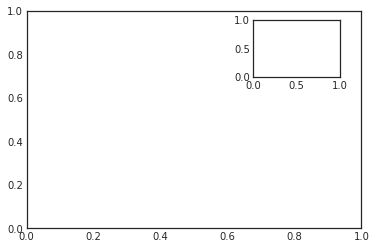

In [108]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

ax1 = plt.axes()  # standard axes
ax2 = plt.axes([0.65, 0.65, 0.2, 0.2])

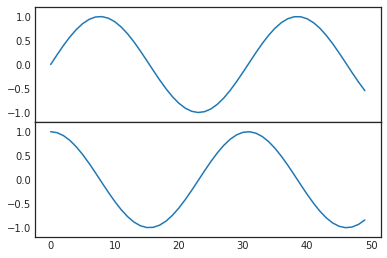

In [109]:
#The equivalent of this command within the object-oriented interface is fig.add_axes()

fig = plt.figure()
ax1 = fig.add_axes([0.1, 0.5, 0.8, 0.4],
                   xticklabels=[], ylim=(-1.2, 1.2))
ax2 = fig.add_axes([0.1, 0.1, 0.8, 0.4],
                   ylim=(-1.2, 1.2))

x = np.linspace(0, 10)
ax1.plot(np.sin(x))
ax2.plot(np.cos(x))

Simple Grids of Subplot

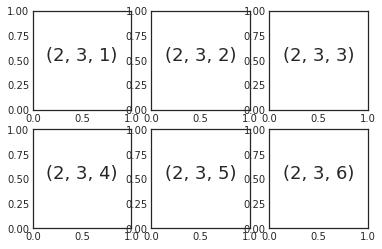

In [110]:
# The lowest level of these is plt.subplot(), which creates a single subplot within a grid
for i in range(1, 7):
    plt.subplot(2, 3, i)
    plt.text(0.5, 0.5, str((2, 3, i)),
             fontsize=18, ha='center')

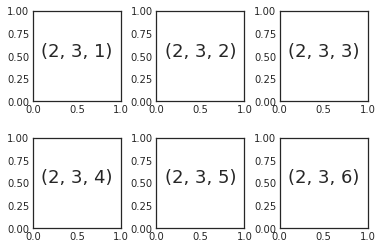

In [111]:
# plt.subplots_adjust can be used to adjust the spacing between these plots
fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(1, 7):
    ax = fig.add_subplot(2, 3, i)
    ax.text(0.5, 0.5, str((2, 3, i)),
           fontsize=18, ha='center')

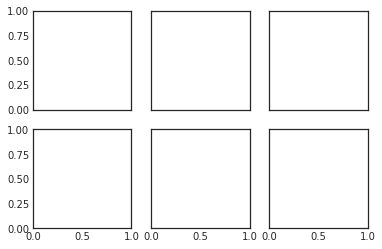

In [112]:
fig, ax = plt.subplots(2, 3, sharex='col', sharey='row')

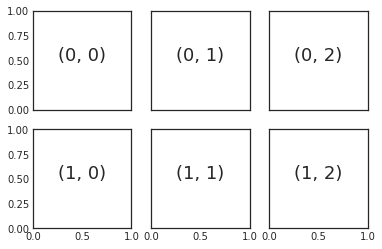

In [113]:
# axes are in a two-dimensional array, indexed by [row, col]
for i in range(2):
    for j in range(3):
        ax[i, j].text(0.5, 0.5, str((i, j)),
                      fontsize=18, ha='center')
fig

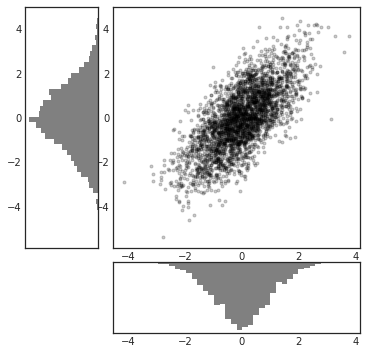

In [114]:
# Create some normally distributed data
mean = [0, 0]
cov = [[1, 1], [1, 2]]
x, y = np.random.multivariate_normal(mean, cov, 3000).T

# Set up the axes with gridspec
fig = plt.figure(figsize=(6, 6))
grid = plt.GridSpec(4, 4, hspace=0.2, wspace=0.2)
main_ax = fig.add_subplot(grid[:-1, 1:])
y_hist = fig.add_subplot(grid[:-1, 0], xticklabels=[], sharey=main_ax)
x_hist = fig.add_subplot(grid[-1, 1:], yticklabels=[], sharex=main_ax)

# scatter points on the main axes
main_ax.plot(x, y, 'ok', markersize=3, alpha=0.2)

# histogram on the attached axes
x_hist.hist(x, 40, histtype='stepfilled',
            orientation='vertical', color='gray')
x_hist.invert_yaxis()

y_hist.hist(y, 40, histtype='stepfilled',
            orientation='horizontal', color='gray')
y_hist.invert_xaxis()

#### Scatter plots

Variables able to be highly correlated. To confirm or validate our hypothesis.

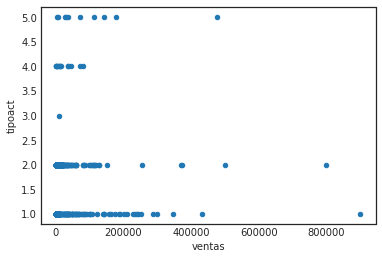

In [231]:
#figure.savefig('.../.jpeg')
#df_sample['ventas'] = dropna()
df_sample['ventas'] = df_sample['ventas'].astype('int64')

df_sample.plot(kind='scatter',x='ventas',y='tipoact')

#### Histograms
Plotting histograms is a great way to visualize the distribution of a numerical variable. Plotting a histogram is a method to understand the most frequent ranges (or bins as they are called) in which the variable lies. One can also check whether the variable is normally distributed or skewed on one side.

Text(0.5, 1.0, 'Frequency of tipoact')

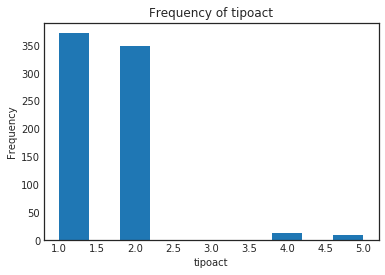

In [232]:
plt.hist(df_sample['tipoact'])
plt.xlabel('tipoact')
plt.ylabel('Frequency')
plt.title('Frequency of tipoact')

Text(0.5, 1.0, 'Frequency of ventas')

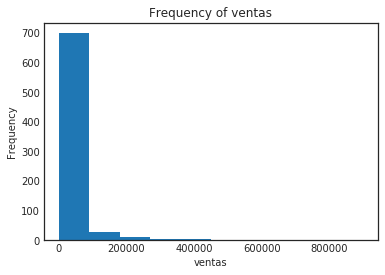

In [268]:
plt.hist(df_sample['ventas'])
plt.xlabel('ventas')
plt.ylabel('Frequency')
plt.title('Frequency of ventas')

#### Boxplots
Boxplots are another way to understand the distribution of a numerical variable. It specifies something called quartiles.

If the numbers in a distribution with 100 numbers are arranged in an increasing order;
* the 1st quartile will occupy the 25th position, 
* the 3rd quartile will occupy the 75th position, and so on. 
* The median will be the average of the 50th and 51st terms.
* Median is the middle term when the numbers in the distribution are arranged in the increasing order. 
* Mode is the one that occurs with the maximum frequency, 
* while mean is the sum of all the numbers divided by their total count.

Text(0.5, 1.0, 'Box Plot of ventas count')

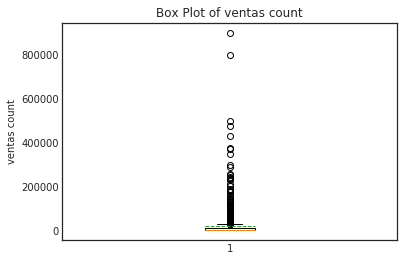

In [276]:
#plt.boxplot(df_sample['ventas'])
plt.boxplot(df_sample['ventas'], showmeans=True, meanline=True)
plt.ylabel('ventas count')
plt.title('Box Plot of ventas count')